## <font face=cambria> Lab 2: Candlestick charts 
- Candlestick chart: mostly commonly used chart type in financial markets to display the movement of stock price for a particular time period 
  - Involves 4 price details: open, high, low, and closing price
  - can be used to show the movement of price for data captured at different time intervals (hourly, daily, monthly, minutely, etc. )
- Candlestick chart in Python: using mplfiannce(matplotlib), plotly, bokeh, bqplot, cufflinks, and altair    
  - Charts created using mplfinance are statics, but created by others are interactive 
- Objective of lab exercise 
  - Use different libraries to create candlesticsk 
  - Try other things like styling charts layout management, adding moving average lins, adding sliders, displaying volumn bars, adding bollinger brands, saving figures 

### <font face=cambria> Part 1: Simple Candlestick using mplfinance
- Dowdload data from Yahoo 'AAPL'
- Also directly fetech data from yahoo 

In [8]:
# Using the downloaded data
import pandas as pd 
df=pd.read_csv('./AAPL.CSV', index_col=0, parse_dates=True)
df_range=pd.date_range(start="2022-09-01", end="2022-09-30")
pipi=df[df.index.isin(df_range)]
pipi.head(5)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-09-01  156.639999  158.419998  154.669998  157.960007  157.960007   
2022-09-02  159.750000  160.360001  154.970001  155.809998  155.809998   
2022-09-06  156.470001  157.089996  153.690002  154.529999  154.529999   
2022-09-07  154.820007  156.669998  153.610001  155.960007  155.960007   
2022-09-08  154.639999  156.360001  152.679993  154.460007  154.460007   

              Volume  
Date                  
2022-09-01  74229900  
2022-09-02  76905200  
2022-09-06  73714800  
2022-09-07  87449600  
2022-09-08  84923800

In [9]:
# Get data from yahoo directly 
from pandas_datareader import data # pandas-datareader是基于Python的专门从一系列的公开在线数据库获取数据的工具库，该接口在urllib3库基础上实现了以客户端身份访问在线数据库的各类金融财经股票数据。
startdate_str='2022-09-01'
enddate_str='2022-09-30'
papa=data.get_data_yahoo('AAPL',startdate_str,enddate_str)
papa.head()

High         Low        Open       Close    Volume  \
Date                                                                   
2022-09-01  158.419998  154.669998  156.639999  157.960007  74229900   
2022-09-02  160.360001  154.970001  159.750000  155.809998  76905200   
2022-09-06  157.089996  153.690002  156.470001  154.529999  73714800   
2022-09-07  156.669998  153.610001  154.820007  155.960007  87449600   
2022-09-08  156.360001  152.679993  154.639999  154.460007  84923800   

             Adj Close  
Date                    
2022-09-01  157.960007  
2022-09-02  155.809998  
2022-09-06  154.529999  
2022-09-07  155.960007  
2022-09-08  154.460007

In [10]:
# Using pandas_profiling to generate descriptive report 
import pandas_profiling
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

- <font face=cambria>Intall TA-Lib
  - Python library talib which is commonly used to calculate various financial indicators like Relative Strength Index (RSI), Simple Moving Average (SMA), Exponential Moving Average (EMA), etc.

In [11]:
import talib as tablib

print("TA-Lib Version : {}".format(talib.__version__))

TA-Lib Version : 0.4.19


In [13]:
pipi['SMA']=talib.SMA(pipi.Close,timeperiod=3) # the moving average of the close prices
pipi['RSI']=talib.RSI(pipi.Close,timeperiod=3) # the relative strength index of the close prices 
pipi['EMA']=talib.EMA(pipi.Close,timeperiod=3) # the exponential moving average of the close prices 
pipi['MOM']=talib.MOM(pipi.Close,timeperiod=3) # the  momentum of the closing prices 
pipi.head()

C:\Users\sansa\AppData\Local\Temp\ipykernel_17124\21401994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pipi['SMA']=talib.SMA(pipi.Close,timeperiod=3) # A moving average of the close prices
C:\Users\sansa\AppData\Local\Temp\ipykernel_17124\21401994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pipi['RSI']=talib.RSI(pipi.Close,timeperiod=3)
C:\Users\sansa\AppData\Local\Temp\ipykernel_17124\21401994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-09-01  156.639999  158.419998  154.669998  157.960007  157.960007   
2022-09-02  159.750000  160.360001  154.970001  155.809998  155.809998   
2022-09-06  156.470001  157.089996  153.690002  154.529999  154.529999   
2022-09-07  154.820007  156.669998  153.610001  155.960007  155.960007   
2022-09-08  154.639999  156.360001  152.679993  154.460007  154.460007   

              Volume         SMA        RSI         EMA       MOM  
Date                                                               
2022-09-01  74229900         NaN        NaN         NaN       NaN  
2022-09-02  76905200         NaN        NaN         NaN       NaN  
2022-09-06  73714800  156.100001        NaN  156.100001       NaN  
2022-09-07  87449600  155.433335  29.423936  156.030004 -2.000000  
2022-09-08  84923800  154.983338  20.112585  155.245006 -1.349991

---
#### <font face=cambria> 1.1 Simple candlestick


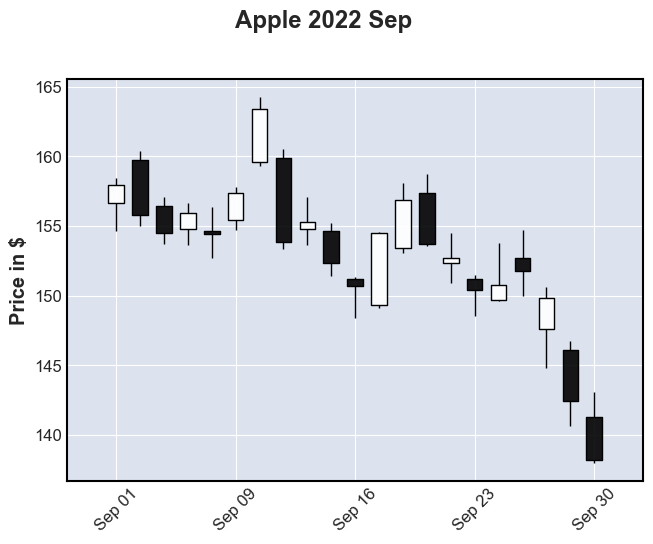

In [23]:
import mplfinance as fplt
fplt.plot(
      pipi,
      type='candle',
      title='Apple 2022 Sep',
      ylabel='Price in $'
)


In [25]:
format(fplt.available_styles()) # all avialble styles on fplt

"['binance', 'blueskies', 'brasil', 'charles', 'checkers', 'classic', 'default', 'ibd', 'kenan', 'mike', 'nightclouds', 'sas', 'starsandstripes', 'yahoo']"

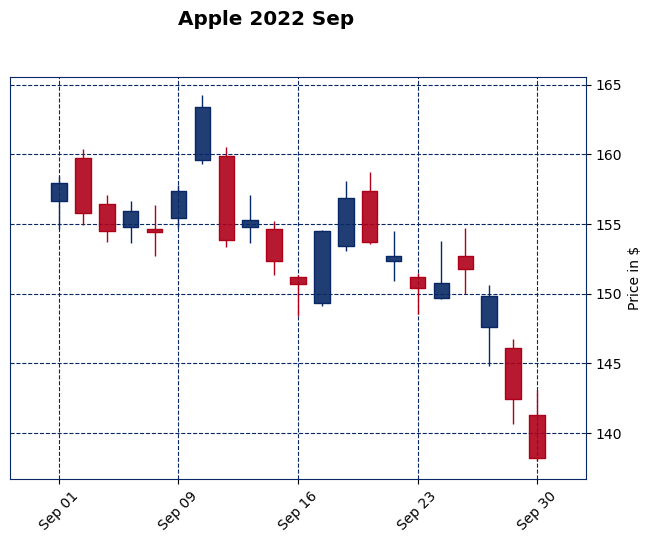

In [34]:
# trying out different styles
fplt.plot(
      pipi,
      type='candle',
      style='starsandstripes',
      title='Apple 2022 Sep',
      ylabel='Price in $'
)

#### <font face=cambria>1.2 Candle sticks with volumes 
   - Simply pass volume=True to plot() method to see the volume plot below the candlestick chart. 
   - Need volume information present in the dataframe for it to work. 
   - Pass ylabel_lower to change label of the y-axis of the volume plot.


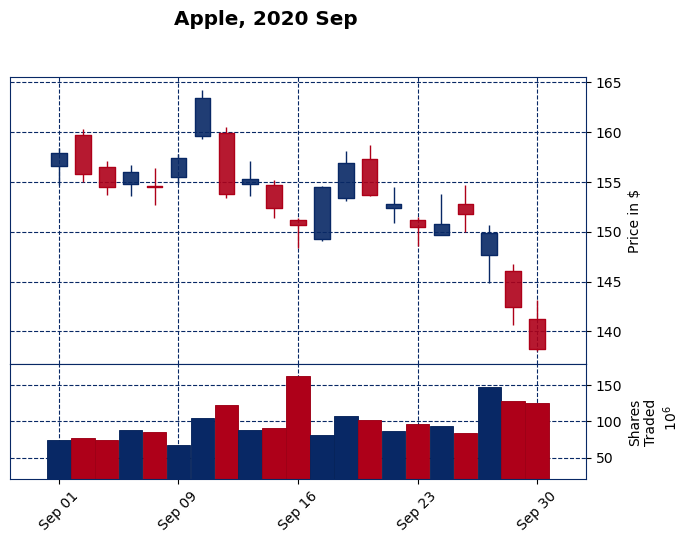

In [35]:
fplt.plot(
      pipi,
      type='candle',
      style='sas',
      title='Apple, 2020 Sep',
      ylabel='Price in $',
      volume=True,
      ylabel_lower='Shares\nTraded' #\n用于分行
)

#### <font face=cambria> 1.3 Showing non-trading days as well 
- pass show-nontrading=true to show non-trading days

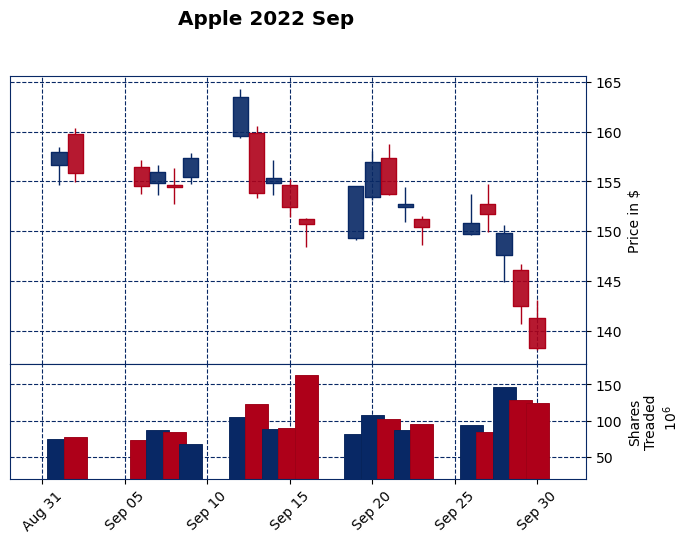

In [44]:
fplt.plot(
      pipi,
      type='candle',
      style='sas',
      title='Apple 2022 Sep',
      ylabel='Price in $',
      volume=True,
      ylabel_lower='Shares\nTreaded',
      show_nontrading=True
)

#### <font face=cambria> 1.4  Adding more technical indicators
- The mplfinance module provides us with method named make_addplot() for adding extra data to chart.
  - The method accepts pandas series or dataframe that has same index as original dataframe used to plot candlestick. It then adds data from series / dataframe to chart.
  - By default, it adds data as a line chart. But, we can modify it to display points and other markers as well.

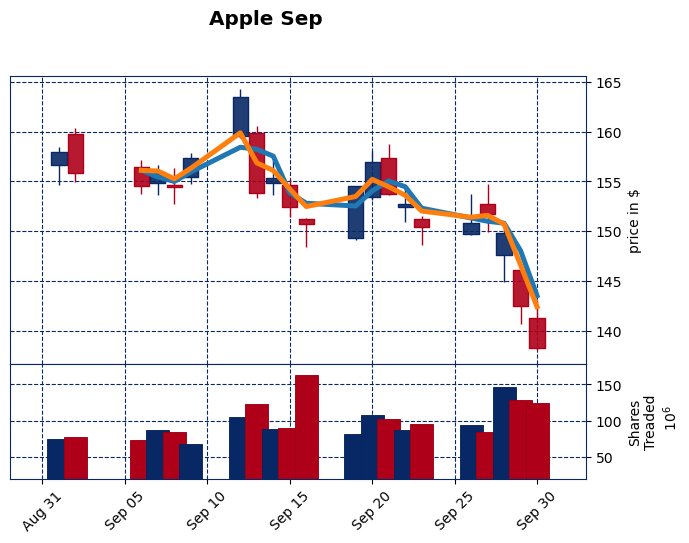

In [47]:
lulu=fplt.make_addplot(pipi[['SMA','EMA']])
fplt.plot(
      pipi,
      type='candle',
      addplot=lulu,
      style='sas',
      title='Apple Sep',
      ylabel='price in $',
      volume=True,
      ylabel_lower='Shares\nTreaded',
      show_nontrading=True,
)

#### <font face=cambria> 1.5 Adding points to charts  along with lines
- In order to plot points, we need to set type parameter as 'scatter'
- n order to plot points, we need to set type parameter as 'scatter'. We can specify marker type using marker parameter.
- We have also set chart parameters like line / points color, marker size, line width, and opacity of points.
- We have then given line and scatter chart as a list to addplot parameter of plot() method.


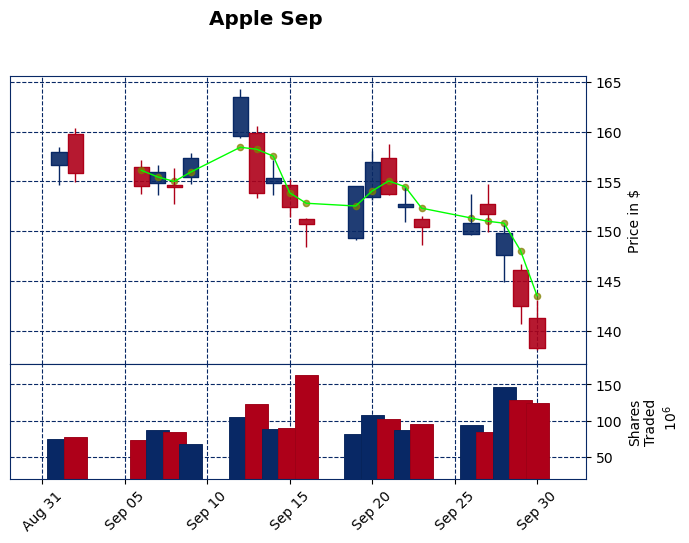

In [49]:
lulu1=fplt.make_addplot(pipi['SMA'],color='lime',width=1)
lulu2=fplt.make_addplot(pipi['SMA'],type='scatter',color='olive',marker='o',alpha=0.7,markersize=20)
fplt.plot(
      pipi,
      type='candle',
      style='sas',
      addplot=[lulu1,lulu2],
      title='Apple Sep',
      ylabel='Price in $',
      volume=True,
      ylabel_lower='Shares\nTraded',
      show_nontrading=True
)

#### <font face=cambria> 1.6 Adding more indicators 
- Try to add RSI (relative strength index)
  - RSI: used in momentum trading measures the speed of a secruity's recent price changes  RSI measures the speed and magnitude of a security's recent price changes to evaluate overvalued or undervalued conditions in the price of that security.
  - The RSI is displayed as an oscillator (a line graph) on a scale of zero to 100.

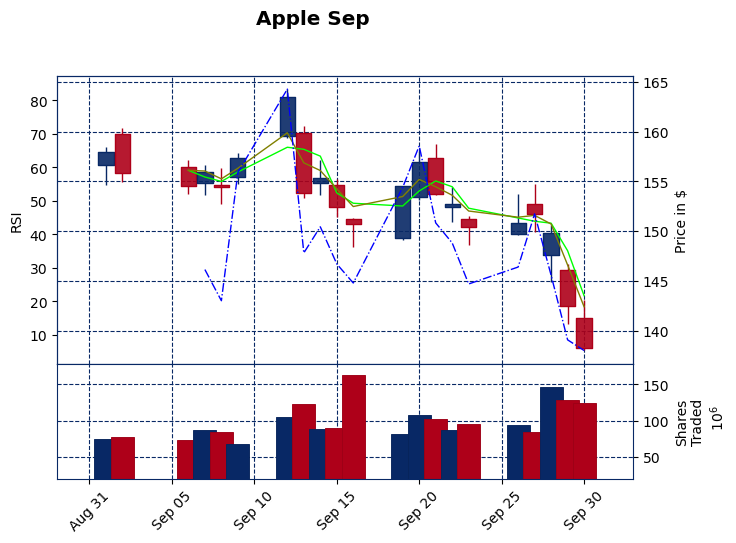

In [53]:
lulu1=fplt.make_addplot(pipi['SMA'],color='lime',width=1)
lulu2=fplt.make_addplot(pipi['EMA'],color='olive',width=1)
lulu3=fplt.make_addplot(pipi['RSI'],color='blue',width=1,ylabel='RSI',secondary_y=True,linestyle='dashdot')
fplt.plot(
      pipi,
      type='candle',
      style='sas',
      addplot=[lulu1,lulu2,lulu3],
      title='Apple Sep',
      ylabel='Price in $',
      volume=True,
      ylabel_lower='Shares\nTraded',
      show_nontrading=True
)

#### <font face=cambria>1.7 Adding extra indiccators to volume chart 
- Use the same **make_addplot()** method
- In order to add data to a volume bar chart, we need to set panel parameter to 1 in make_addplot() method.

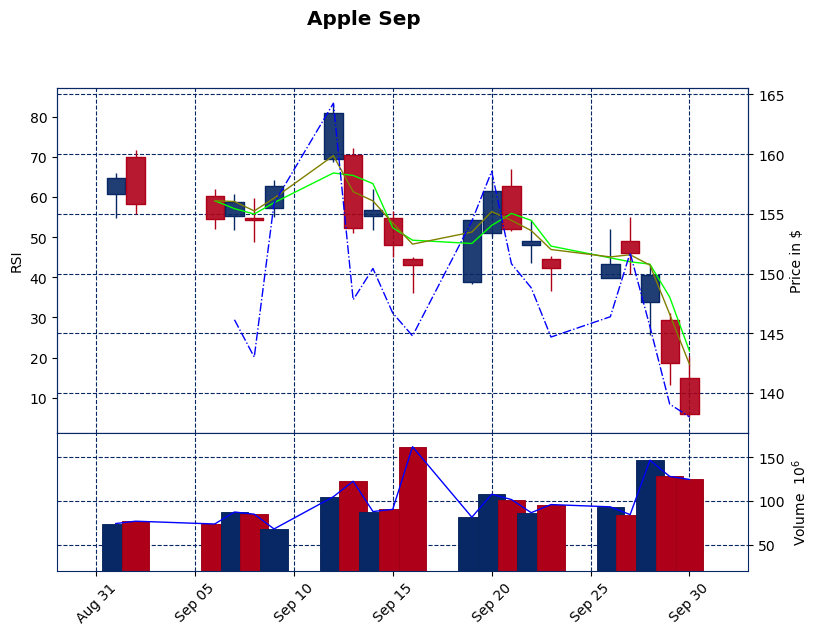

In [58]:
lulu1=fplt.make_addplot(pipi['SMA'],color='lime',width=1)
lulu2=fplt.make_addplot(pipi['EMA'],color='olive',width=1)
lulu3=fplt.make_addplot(pipi['RSI'],color='blue',width=1,ylabel='RSI',secondary_y=True,linestyle='dashdot')
# Adding data to the volume chart 
volume=fplt.make_addplot(pipi['Volume'],color='blue',width=1,panel=1)
fplt.plot(
      pipi,
      type='candle',
      addplot=[lulu1,lulu2,lulu3,volume],
      style='sas',
      title='Apple Sep',
      ylabel='Price in $',
      volume=True,
      show_nontrading=True,
      figscale=1.2
)

#### 1.8<font face=cambria> More about layout, styling and moving average 
- Passing the color: up and down
- 

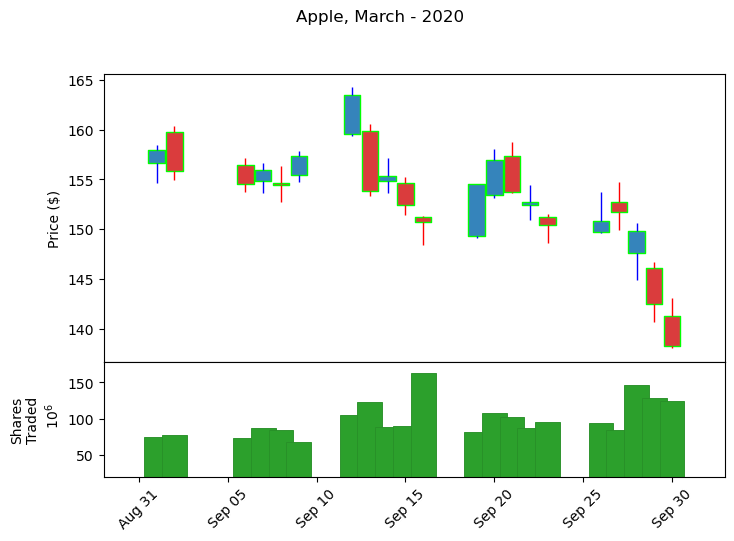

In [59]:
mc = fplt.make_marketcolors(
                            up='tab:blue',down='tab:red',
                            edge='lime',
                            wick={'up':'blue','down':'red'},
                            volume='tab:green',
                           )

s  = fplt.make_mpf_style(marketcolors=mc)

fplt.plot(
        pipi,
        type="candle",
        title='Apple, March - 2020',
        ylabel='Price ($)',
        figratio=(12,8),
        volume=True,
        ylabel_lower='Shares\nTraded',
        show_nontrading=True,
        style=s,
    )

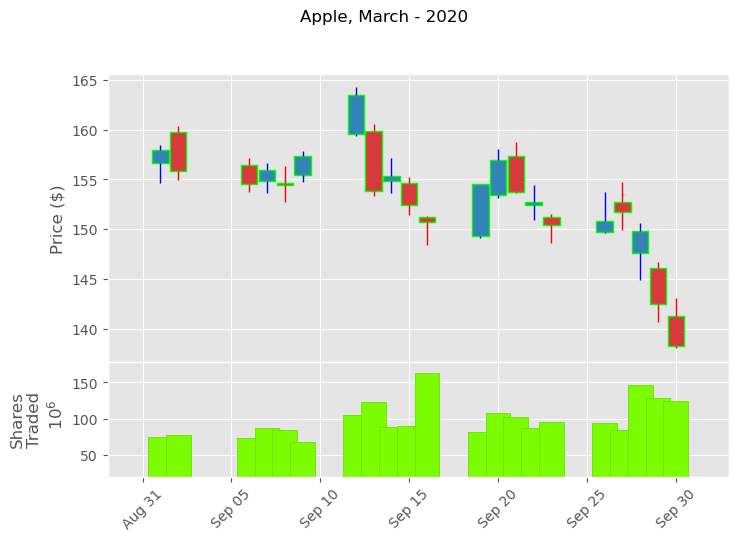

In [60]:
mc = fplt.make_marketcolors(
                            up='tab:blue',down='tab:red',
                            edge='lime',
                            wick={'up':'blue','down':'red'},
                            volume='lawngreen',
                           )

s  = fplt.make_mpf_style(base_mpl_style="ggplot", marketcolors=mc)

fplt.plot(
        pipi,
        type="candle",
        title='Apple, March - 2020',
        ylabel='Price ($)',
        figratio=(12,8),
        volume=True,
        ylabel_lower='Shares\nTraded',
        show_nontrading=True,
        style=s
    )

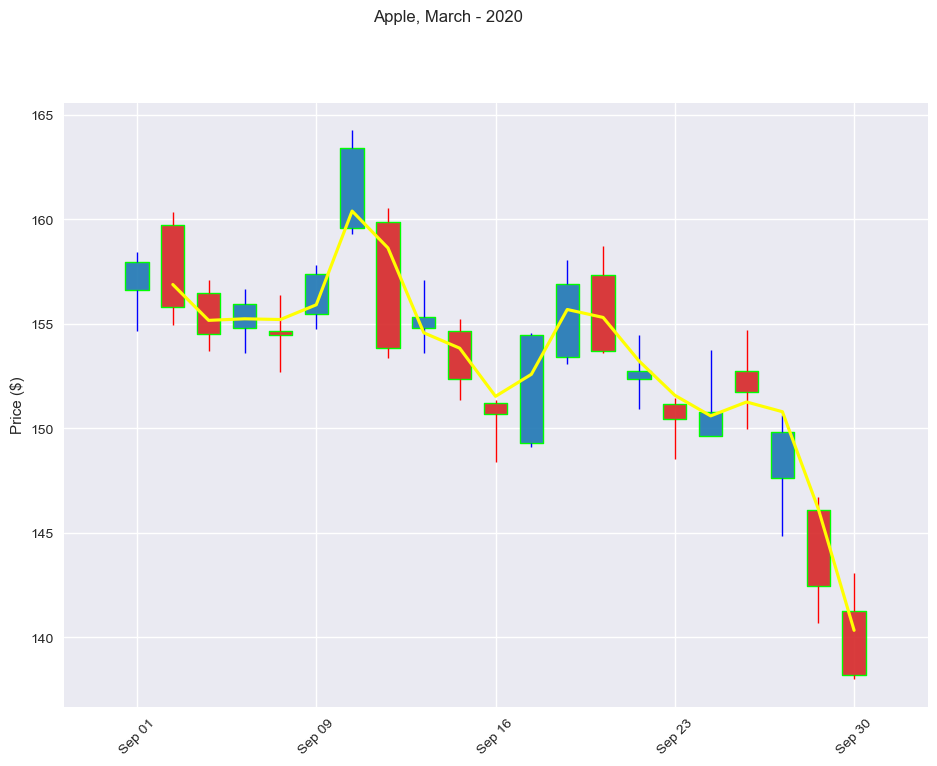

In [61]:
mc = fplt.make_marketcolors(
                            up='tab:blue',down='tab:red',
                            edge='lime',
                            wick={'up':'blue','down':'red'},
                            volume='lawngreen',
                           )

s  = fplt.make_mpf_style(base_mpl_style="seaborn", marketcolors=mc, mavcolors=["yellow"])

fplt.plot(
        pipi,
        type="candle",
        title='Apple, March - 2020',
        ylabel='Price ($)',
        mav=2,
        figscale=1.5,
        style=s
    )

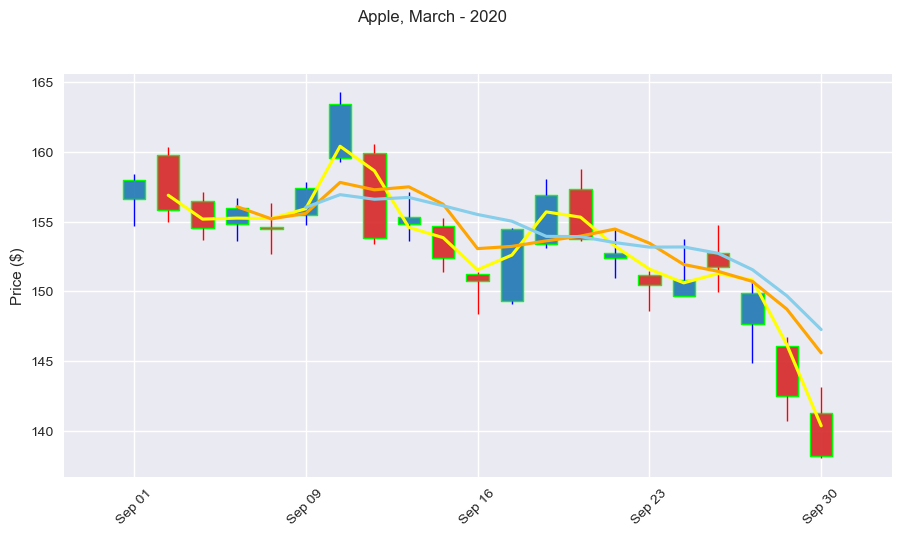

In [62]:
mc = fplt.make_marketcolors(
                            up='tab:blue',down='tab:red',
                            edge='lime',
                            wick={'up':'blue','down':'red'},
                            volume='lawngreen',
                           )

s  = fplt.make_mpf_style(base_mpl_style="seaborn", marketcolors=mc, mavcolors=["yellow","orange","skyblue"])

fplt.plot(
        pipi,
        type="candle",
        title='Apple, March - 2020',
        ylabel='Price ($)',
        mav=(2,4,6),
        figratio=(12,6),
        style=s
    )

#### <font face=cambria> 1.8 Saving figures
- Through **savefig** attributes


In [63]:
mc = fplt.make_marketcolors(
                            up='tab:blue',down='tab:red',
                            edge='lime',
                            wick={'up':'blue','down':'red'},
                            volume='lawngreen',
                           )

s  = fplt.make_mpf_style(base_mpl_style="seaborn", marketcolors=mc)

fplt.plot(
       pipi,
        type="candle",
        title='Apple, March - 2020',
        ylabel='Price ($)',
        figratio=(12,6),
        style=s,
        savefig='apple_march_2020.png'
    )

In [64]:
mc = fplt.make_marketcolors(
                            up='tab:blue',down='tab:red',
                            edge='lime',
                            wick={'up':'blue','down':'red'},
                            volume='lawngreen',
                           )

s  = fplt.make_mpf_style(base_mpl_style="seaborn", marketcolors=mc)

fplt.plot(
       pipi,
        type="candle",
        title='Apple, March - 2020',
        ylabel='Price ($)',
        mav=(2,4,6),
        figratio=(12,6),
        style=s,
        savefig=dict(fname='apple_march_2020.png',dpi=100,pad_inches=0.25)
    )

-----------------------
<font face=cambria>

## Part 2: Candlestick using plotly
#### 2.1 Candlestick with slider to analyze range 
- Use mehtod of **plotly.graph_objects()
- Plotly provides another small summary chart with sliders to let us highlight and view a particular period of a candlestick.

In [66]:
import plotly as plt
import plotly.graph_objects as go
candlestick=go.Candlestick(
      x=pipi.index,
      open=pipi['Open'],
      close=pipi['Close'],
      high=pipi['High'],
      low=pipi['Low'])
fig=go.Figure(data=[candlestick])
fig.show()

In [67]:
# without slider 
import plotly as plt
import plotly.graph_objects as go
candlestick=go.Candlestick(
      x=pipi.index,
      open=pipi['Open'],
      close=pipi['Close'],
      high=pipi['High'],
      low=pipi['Low'])
fig=go.Figure(data=[candlestick])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

#### 2.2 Candlestick layout and styling 


In [68]:
import plotly as plt
import plotly.graph_objects as go
candlestick=go.Candlestick(
      x=pipi.index,
      open=pipi['Open'],
      close=pipi['Close'],
      high=pipi['High'],
      low=pipi['Low'])
fig=go.Figure(data=[candlestick])
fig.update_layout(width=800,height=600,title='Apple, Sep',yaxis_title='Apple')
fig.show()

In [69]:
import plotly as plt
import plotly.graph_objects as go
candlestick=go.Candlestick(
      x=pipi.index,
      open=pipi['Open'],
      close=pipi['Close'],
      high=pipi['High'],
      low=pipi['Low'],increasing_line_color= 'blue', decreasing_line_color= 'orange',
)
fig=go.Figure(data=[candlestick])
fig.update_layout(width=800,height=600,title='Apple, Sep',yaxis_title='Apple')
fig.show()

#### 2.3 Adding more technical indicators 
- First, create a candlestick chart like previous example.
- Then, create line charts for SMA and EMA indicators.
- Then, provide both charts to Figure() method along with a candlestick chart to plot them all in same figure.

In [73]:
import plotly as plt
import plotly.graph_objects as go
candlestick=go.Candlestick(
      x=pipi.index,
      open=pipi['Open'],
      close=pipi['Close'],
      high=pipi['High'],
      low=pipi['Low'],increasing_line_color= 'blue', decreasing_line_color= 'orange',
)
sma = go.Scatter(x=pipi.index,
                 y=pipi["SMA"],
                 yaxis="y1",
                 name="SMA"
                )
ema = go.Scatter(x=pipi.index,
                 y=pipi["EMA"],
                 name="EMA"
                )
fig = go.Figure(data=[candlestick, sma, ema])

fig.update_layout(
    width=800, height=600,
    title="Apple, March - 2020",
    yaxis_title='AAPL Stock',
)

fig.show()

------
## Part 3: Using Bokeh for candlestick chart 
- Use vbar() and segment() methods of bokeh to create bars and lines to eventually create a candlestick chart.

In [77]:
import bokeh
from math import pi
from bokeh.plotting import figure
from bokeh.io import output_notebook,show
from bokeh.resources import INLINE

output_notebook(resources=INLINE)
inc=pipi.Close>pipi.Open
dec=pipi.Close<pipi.Open
w = 12*60*60*1000
fig=figure(x_axis_type='datetime',plot_width=800,plot_height=500,title='Apple Sep')
fig.segment(pipi.index,pipi.High,pipi.index,pipi.Low,color='black')
fig.vbar(pipi.index[inc], w, pipi.Open[inc], pipi.Close[inc],
         fill_color="lawngreen", line_color="red")
fig.vbar(pipi.index[dec], w, pipi.Open[dec], pipi.Close[dec],
         fill_color="tomato", line_color="lime")
fig.xaxis.axis_label="Date in March-2020"
fig.yaxis.axis_label="Price ($)"

show(fig)

Loading BokehJS ...

In [79]:
# with volume bar 
from bokeh.layouts import column
inc = pipi.Close > pipi.Open
dec = pipi.Open > pipi.Close

w = 12*60*60*1000

## Candlestick chart
candlestick = figure(x_axis_type="datetime", plot_width=800, plot_height=500, title = "Apple, March - 2020")

candlestick.segment(pipi.index, pipi.High, pipi.index, pipi.Low, color="black")

candlestick.vbar(pipi.index[inc], w, pipi.Open[inc], pipi.Close[inc],
         fill_color="lawngreen", line_color="red")

candlestick.vbar(pipi.index[dec], w, pipi.Open[dec], pipi.Close[dec],
         fill_color="tomato", line_color="lime")

## Volume Chart
volume = figure(x_axis_type="datetime", plot_width=800, plot_height=200)

volume.vbar(pipi.index, width=w, top=pipi.Volume,
            fill_color="dodgerblue", line_color="tomato", alpha=0.8)


volume.xaxis.axis_label="Date in March-2020"
volume.yaxis.axis_label="Volume"
candlestick.yaxis.axis_label="Price ($)"

show(column(candlestick, volume))

## Part 4 Using Cufflinks for candlestick plotting 
#### 4.1 Simple candlestick chart 
- Call the iplot() method on the dataframe with OHLC data passing kind parameter value as candle to create a candlestick chart using cufflinks. 

In [80]:
import cufflinks as cf
cf.set_config_file(theme='pearl',sharing='public',offline=True)
pipi.iplot(kind='candle',keys=['Open','Close','High','Low'],rangeslider=True)

In [81]:
# setting the kind parameter of the iplot() method to ohlc 
pipi.iplot(kind='ohlc',keys=['Open','Close','Low','High'])

#### 4.2 Quant Figure in cufflinks 
- Cufflinks also let us add volume, Bollinger bands, exponential moving average, relative strength indicator, moving average convergence divergence, average directional index, commodity channel indicator, directional movement index, parabolic SAR, resistance line, and trend line functionalities to our chart
- We first need to create a figure object by calling the QuantFig() method of cufflinks passing it pandas dataframe with OHLC data. We can then call the list of below methods on QuantFig instance to add functionalities one by one to the figure before calling iplot() to finally display the figure.
<br> add_bollinger_bands() - It adds Bollinger Bands (BOLL) study to the figure.<br> 
add_volume() - It adds volume bar charts to the figure.<br> 
add_sma() - It adds Simple Moving Average (SMA) study to the figure.<br> 
add_rsi() - It adds Relative Strength Indicator (RSI) study to the figure.<br> 
add_adx() - It adds Average Directional Index (ADX) study to the figure.<br> 
add_cci() - It adds Commodity Channel Indicator study to the figure.<br> 
add_dmi() - It adds Directional Movement Index (DMI) study to the figure.<br> 
add_ema() - It adds Exponential Moving Average (EMA) to the figure.<br> 
add_atr() - It adds Average True Range (ATR) study to the figure.<br> 
add_macd() - It adds Moving Average Convergence Divergence (MACD) to the figure.<br> 
add_ptps() - It adds Parabolic SAR (PTPS) study to the figure.<br> 
add_resistance() - It adds resistance line to the figure.<br> 
add_trendline() - It adds trend line to the figure.<br> 
add_support() - It adds support line to the figure.<br> 

In [90]:
apple_df = pd.read_csv('./AAPL.CSV', index_col=0, parse_dates=True)
qf=cf.QuantFig(apple_df,title='Apple Quant Figure',legend='top',name='GS')
qf.add_bollinger_bands()
qf.add_volume()

qf.iplot()

In [95]:
# adding SMA and RSI
from turtle import width


qf=cf.QuantFig(apple_df,title='Apple', legend='top',name='GS')
qf.add_bollinger_bands(periods=20,boll_std=2,colors=['grey','pink'],fill=True)
qf.add_sma(3,width=2,color='green',legendgroup=True)
qf.add_rsi(10,color='java')
qf.iplot()

In [96]:
# adds average directional index, commodity channel indicator, directional movement index, exponential moving average 
qf=cf.QuantFig(apple_df,title='Apple',legend='top',name='GS')
qf.add_adx()
qf.add_cci()
qf.add_dmi()
qf.add_ema()
qf.iplot()